# General Overview - Statistical Analysis

- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

Some categorical variables are nominal attributes, meaning that the variables in each column are independent of each other (i.e. no sense of order). Others are binary and have only two answer choices: Yes and No.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm, t, chisquare
from scipy.stats import chi2_contingency
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('tree_census_stat_ready.csv', index_col=0, encoding='utf-8') # import data
tree = data.copy() # save a copy of data as tree

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651535 entries, 0 to 651534
Data columns (total 22 columns):
tree_id         651535 non-null int64
tree_dbh        651535 non-null int64
curb_loc        651535 non-null object
health          651535 non-null object
spc_common      651535 non-null object
steward         651535 non-null object
guards          651535 non-null object
sidewalk        651535 non-null object
problems        651535 non-null object
root_stone      651535 non-null object
root_grate      651535 non-null object
root_other      651535 non-null object
trunk_wire      651535 non-null object
trnk_light      651535 non-null object
trnk_other      651535 non-null object
brch_light      651535 non-null object
brch_shoe       651535 non-null object
brch_other      651535 non-null object
borough         651535 non-null object
longitude       651535 non-null float64
latitude        651535 non-null float64
num_problems    651535 non-null int64
dtypes: float64(2), int64(3), ob

In [4]:
# looking at sample data

tree

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,problems,root_stone,...,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,longitude,latitude,num_problems
0,180683,3,OnCurb,Fair,red maple,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Queens,-73.844215,40.723092,0
1,200540,21,OnCurb,Fair,pin oak,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Queens,-73.818679,40.794111,1
2,204026,3,OnCurb,Good,honeylocust,1or2,None,Damage,None,No,...,No,No,No,No,No,No,Brooklyn,-73.936608,40.717581,0
3,204337,10,OnCurb,Good,honeylocust,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Brooklyn,-73.934456,40.713537,1
4,189565,21,OnCurb,Good,American linden,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Brooklyn,-73.975979,40.666778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651530,155433,25,OnCurb,Good,pin oak,None,None,Damage,None,No,...,No,No,No,No,No,No,Brooklyn,-73.954944,40.713211,0
651531,183795,7,OnCurb,Good,Kentucky yellowwood,1or2,None,NoDamage,None,No,...,No,No,No,No,No,No,Queens,-73.856650,40.715194,0
651532,166161,12,OnCurb,Good,red maple,None,None,Damage,None,No,...,No,No,No,No,No,No,Staten Island,-74.136517,40.620762,0
651533,184028,9,OnCurb,Good,red maple,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Bronx,-73.903115,40.850828,0


The problems column is reflected in the adjacent 9 columns so we are removing it from our dataset along with longitude and latitude since they are used to map the location of the trees. We do not need the latitude and longitude columns either since they are used to map the location of the tree, see data storytelling for the maps. Finally, we are removing tree_id since the trees are identified using their index number.

In [5]:
col_remove = ['tree_id', 'problems', 'longitude', 'latitude'] # columns to remove

tree = tree.drop(col_remove, axis=1)

In [6]:
# cleaned up dataset

tree.head(10)

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,num_problems
0,3,OnCurb,Fair,red maple,None,None,NoDamage,No,No,No,No,No,No,No,No,No,Queens,0
1,21,OnCurb,Fair,pin oak,None,None,Damage,Yes,No,No,No,No,No,No,No,No,Queens,1
2,3,OnCurb,Good,honeylocust,1or2,None,Damage,No,No,No,No,No,No,No,No,No,Brooklyn,0
3,10,OnCurb,Good,honeylocust,None,None,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn,1
4,21,OnCurb,Good,American linden,None,None,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn,1
5,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,No,No,No,No,No,No,No,No,No,Manhattan,0
6,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,No,No,No,No,No,No,No,No,No,Manhattan,0
7,9,OnCurb,Good,American linden,None,None,NoDamage,No,Yes,No,No,No,No,No,No,No,Manhattan,1
8,6,OnCurb,Good,honeylocust,None,None,NoDamage,No,No,No,No,No,No,No,No,No,Staten Island,0
9,21,OffsetFromCurb,Fair,London planetree,None,None,NoDamage,No,No,No,No,No,No,No,No,No,Brooklyn,0


# Statistical Testing - Chi-Square Test for Association

We use the chi-square test for association to determine any statistical significance between variables.

## Curb Location (curb_loc)

In [7]:
# Null Hypothesis: There is no relationship between health and curb_loc (independent).
# Alternate Hypothesis: There is a relationship between health and curb_loc (not independent).
# p-value: 0.05

# using the crosstab function

curb_loc_table = pd.crosstab(tree.curb_loc, [tree.health])
display(curb_loc_table)

health,Fair,Good,Poor
curb_loc,,,
OffsetFromCurb,4022,20814,963
OnCurb,92405,507513,25818


In [8]:
# calcuate expected values

offset_total = len(tree[tree.curb_loc == 'OffsetFromCurb'])
oncurb_total = len(tree[tree.curb_loc == 'OnCurb'])
good_total = len(tree[tree.health == 'Good'])
fair_total = len(tree[tree.health == 'Fair'])
poor_total = len(tree[tree.health == 'Poor'])
grand_total = len(tree)

print('Offset From Curb Total: ', offset_total)
print('On Curb Total: ', oncurb_total)
print('Good Total: ', good_total)
print('Fair Total: ', fair_total)
print('Poor Total: ', poor_total)
print('Grand Total: ', grand_total)

offset_good = (offset_total * good_total) / grand_total
offset_fair = (offset_total * fair_total) / grand_total
offset_poor = (offset_total * poor_total) / grand_total
oncurb_good = (oncurb_total * good_total) / grand_total
oncurb_fair = (oncurb_total * fair_total) / grand_total
oncurb_poor = (oncurb_total * poor_total) / grand_total

Offset From Curb Total:  25799
On Curb Total:  625736
Good Total:  528327
Fair Total:  96427
Poor Total:  26781
Grand Total:  651535


In [9]:
# calculate chi-square values using observed and expected values

observed = [20814, 4022, 963, 507513, 92405, 25818] # offset good, fair, poor, oncurb good, fair, poor
expected = [offset_good, offset_fair, offset_poor, oncurb_good, oncurb_fair, oncurb_poor]

values = []

for e, o in enumerate(observed):
    sig = (o - expected[e])**2 / expected[e]
    values.append(sig)
    
chisq_curb_loc = sum(values)
print('Chi-squared value: ', chisq_curb_loc)

Chi-squared value:  21.208951781289166


Next, we find a p-value associated with the chi-squared value that tells us if the difference between the observed and associated values are statistically significant.

In [10]:
# using chisquare

observed = np.array([20814, 4022, 963, 507513, 92405, 25818]) # offset good, fair, poor, oncurb good, fair, poor
expected = np.array([offset_good, offset_fair, offset_poor, oncurb_good, oncurb_fair, oncurb_poor])

chisquare_value, pvalue = chisquare(observed, expected)

print('Chi-squared value: ', chisquare_value) # confirmed!
print('Curb_loc p-value: ', pvalue)

Chi-squared value:  21.208951781289166
Curb_loc p-value:  0.0007396291269688524


The calculated p-value of 0.0007 tells us that we can reject the null hypothesis and accept the alternate hypothesis that there is a relationship between the curb location and tree health.

## Stewardship

In [11]:
# Null Hypothesis: There is no relationship between health and steward.
# Alternate Hypothesis: There is a relationship between health and steward.
# p-value: 0.05

# using the crosstab function

steward_table = pd.crosstab(tree.steward, [tree.health])
display(steward_table)

health,Fair,Good,Poor
steward,,,
1or2,21883,115231,6276
3or4,2829,15594,747
4orMore,200,1360,49
None,71515,396142,19709


In [12]:
# using a shortcut, chi2_contingency

chisq_value, pvalue, df, expected = chi2_contingency(steward_table)

print('Chi-square value: ', chisq_value)
print('Steward p-value: ', pvalue) # safe to reject the null hypothesis

Chi-square value:  82.64204316499212
Steward p-value:  1.0158580809907348e-15


## Guards

In [13]:
# Null Hypothesis: There is no relationship between health and guards.
# Alternate Hypothesis: There is a relationship between health and guards.
# p-value: 0.05

guard_table = pd.crosstab(tree.guards, [tree.health])
display(guard_table)

health,Fair,Good,Poor
guards,,,
Harmful,3836,15313,1091
Helpful,7159,42602,2061
None,84057,464503,23169
Unsure,1375,5909,460


In [63]:
chisq_value, pvalue, df, expected = chi2_contingency(guard_table)

print('Chi-square value: ', chisq_value)
print('Guard p-value: ', pvalue) # safe to reject the null hypothesis

Chi-square value:  575.1113270237256
Guard p-value:  5.43997022022521e-121


## Sidewalk Condition

In [15]:
# Null Hypothesis: There is no relationship between health and sidewalks.
# Alternate Hypothesis: There is a relationship between health and sidewalks.
# p-value: 0.05

sidewalk_table = pd.crosstab(tree.sidewalk, [tree.health])
display(sidewalk_table)

health,Fair,Good,Poor
sidewalk,,,
Damage,28676,151750,6593
NoDamage,67751,376577,20188


In [16]:
chisq_value, pvalue, df, expected = chi2_contingency(sidewalk_table)

print('Chi-square value: ', chisq_value)
print('Guard p-value: ', pvalue) # safe to reject the null hypothesis

Chi-square value:  268.98082116629007
Guard p-value:  3.9044225721239635e-59


## Borough

In [17]:
# Null Hypothesis: There is no relationship between health and borough.
# Alternate Hypothesis: There is a relationship between health and borough.
# p-value: 0.05

borough_table = pd.crosstab(tree.borough, [tree.health])
display(borough_table)

health,Fair,Good,Poor
borough,,,
Bronx,10879,66546,3092
Brooklyn,25060,138119,6454
Manhattan,11456,47338,3607
Queens,34512,193789,9401
Staten Island,14520,82535,4227


In [18]:
chisq_value, pvalue, df, expected = chi2_contingency(borough_table)

print('Chi-square value: ', chisq_value)
print('Borough p-value: ', pvalue) # very safe to reject the null hypothesis

Chi-square value:  1387.3756826254964
Borough p-value:  3.0368189425788952e-294


## Tree Type (spc_common)

In [19]:
# Null Hypothesis: There is no relationship between health and the type of tree.
# Alternate Hypothesis: There is a relationship between health and the type of tree.
# p-value: 0.05

spc_common_table = pd.crosstab(tree.spc_common, [tree.health])
display(spc_common_table)

health,Fair,Good,Poor
spc_common,,,
'Schubert' chokecherry,717,3927,242
American beech,38,213,21
American elm,1293,6404,266
American hophornbeam,158,866,57
American hornbeam,203,1220,93
...,...,...,...
weeping willow,51,218,13
white ash,166,897,58
white oak,263,1329,92


In [20]:
chisq_value, pvalue, df, expected = chi2_contingency(spc_common_table)

print('Chi-square value: ', chisq_value)
print('Borough p-value: ', pvalue) # safe to reject the null hypothesis

Chi-square value:  16810.881359034953
Borough p-value:  0.0


There are 132 unique kinds of trees. The number of trees vastly outnumber the answer types for the other columns so we are choosing not to use spc_common as a factor for our model.

In [21]:
print('Number of unique trees:', len(tree.spc_common.unique()))

Number of unique trees: 132


## root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, brch_other

In [22]:
# these 9 columns are similar to each other (binaries) so we are creating a function to handle all of them at once

root_trunk_branch = ['root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']

rt_tk_bh_values = []

for x in root_trunk_branch:
    table = pd.crosstab(tree[x], [tree.health])
    chisq_value, pvalue, df, expected = chi2_contingency(table)
    rt_tk_bh_values.extend(('Column: ' + x, 'Chi-square: ', chisq_value, 'p-value:', pvalue, '-----------'))

In [23]:
display(rt_tk_bh_values)

['Column: root_stone',
 'Chi-square: ',
 602.1719849387213,
 'p-value:',
 1.7378604199012528e-131,
 '-----------',
 'Column: root_grate',
 'Chi-square: ',
 356.68976230775087,
 'p-value:',
 3.5140039001739447e-78,
 '-----------',
 'Column: root_other',
 'Chi-square: ',
 1928.3000460610629,
 'p-value:',
 0.0,
 '-----------',
 'Column: trunk_wire',
 'Chi-square: ',
 511.1079115744369,
 'p-value:',
 1.0335397233161574e-111,
 '-----------',
 'Column: trnk_light',
 'Chi-square: ',
 42.65188376759023,
 'p-value:',
 5.473449537752943e-10,
 '-----------',
 'Column: trnk_other',
 'Chi-square: ',
 11787.16656714847,
 'p-value:',
 0.0,
 '-----------',
 'Column: brch_light',
 'Chi-square: ',
 410.2875656415676,
 'p-value:',
 8.07582918010992e-90,
 '-----------',
 'Column: brch_shoe',
 'Chi-square: ',
 35.43604272124426,
 'p-value:',
 2.01911517512005e-08,
 '-----------',
 'Column: brch_other',
 'Chi-square: ',
 15111.455650416505,
 'p-value:',
 0.0,
 '-----------']

The p-values all show that there is statistical significance between each of the nine columns and tree health.

## Tree Relationship Tables

Let's see if there is any significant relationship between the independent variables.

- What is a good null hypothesis? Alternate hypothesis?
- Use p-value of 0.05

In [24]:
# pd.crosstab([tree.sidewalk, tree.borough, tree.health], [tree.steward, tree.guards, tree.curb_loc])

In [25]:
compare = pd.crosstab(tree.sidewalk, tree.borough)

chisq_value, pvalue, df, expected = chi2_contingency(borough_table)

print('Chi-square value: ', chisq_value)
print('Borough p-value: ', pvalue)

Chi-square value:  1387.3756826254964
Borough p-value:  3.0368189425788952e-294


# Analyzing Diameter Distributions

We use a 2-sample t-test in order to determine if there is any significance between the averages of two population means.

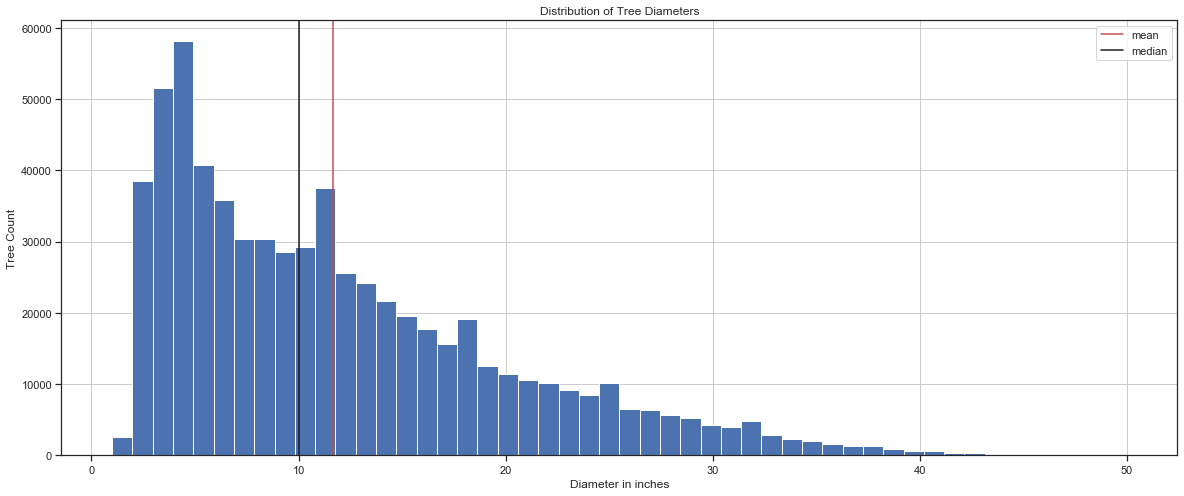

In [26]:
plt.figure(figsize=(20, 8))
tree.tree_dbh.hist(bins=50)
plt.xlabel('Diameter in inches')
plt.ylabel('Tree Count')
plt.title('Distribution of Tree Diameters')
plt.axvline(np.mean(tree.tree_dbh), color='r', label='mean')
plt.axvline(np.median(tree.tree_dbh), color='k', label='median')
plt.legend()
plt.show()

In [27]:
# printing the mean and median

rp.summary_cont(tree.tree_dbh)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,tree_dbh,651535.0,11.674665,8.366295,0.010365,11.65435,11.69498


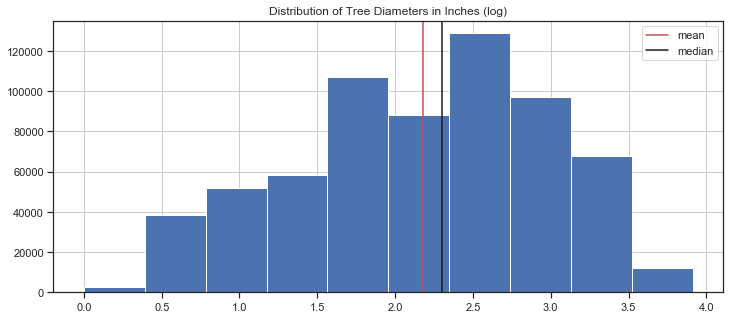

In [28]:
# take the log of tree_dbh

dbh_log = np.log(tree.tree_dbh)

plt.figure(figsize=(12, 5))
dbh_log.hist()
plt.title('Distribution of Tree Diameters in Inches (log)')
plt.axvline(np.mean(dbh_log), color='r', label='mean')
plt.axvline(np.median(dbh_log), color='k', label='median')
plt.legend()
plt.show() # the distribution appears closer to normal after taking the log

Taking the log of the diameters, the distribution is slightly skewed to the left but is closer to a normal distribution than previously.

In [29]:
# diameter (inches) distribution

tree.groupby('health')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
health,,,,,,,,
Fair,96427.0,10.954370,7.61766,1.0,5.0,9.0,15.0,50.0
Good,528327.0,11.942466,8.53741,1.0,5.0,10.0,17.0,50.0
Poor,26781.0,8.985064,6.74574,1.0,4.0,7.0,12.0,50.0


In [58]:
rp.summary_cont(tree.groupby('health')['tree_dbh'])

,N,Mean,SD,SE,95% Conf.,Interval
health,,,,,,
Fair,96427,10.954370,7.61766,0.024531,10.906288,11.002451
Good,528327,11.942466,8.53741,0.011746,11.919444,11.965487
Poor,26781,8.985064,6.74574,0.041221,8.904270,9.065858


In [30]:
## separate out based on health (tree_dbh)
## compute test statistic
## prove disprove diameters
## 2 sample t test

## student's t-test for dependent samples since we are drawing our samples from the same population, varied by health
## paired student's t-test

In [31]:
# look into the correlation, tree diameters can explain the health of a tree

In [32]:
# group diameters according to tree health

health_good = tree[tree.health == 'Good']['tree_dbh']
health_fair = tree[tree.health =='Fair']['tree_dbh']
health_poor = tree[tree.health == 'Poor']['tree_dbh']

# bootstrap functions to draw samples from

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for x in range(size)])

In [62]:
# comparing good and fair trees

mean_good = np.mean(health_good)
mean_fair = np.mean(health_fair)
mean_poor = np.mean(health_poor)

# draw bootstrap reps
bs_reps_good = draw_bs_reps(health_good, np.mean, size=10000)
bs_reps_fair = draw_bs_reps(health_fair, np.mean, size=10000)
bs_reps_poor = draw_bs_reps(health_poor, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_good = np.percentile(bs_reps_good, [2.5, 97.5])
conf_int_fair = np.percentile(bs_reps_fair, [2.5, 97.5])
conf_int_poor = np.percentile(bs_reps_poor, [2.5, 97.5])

# Print the results
print("""
good:  mean = {0:.3f} min., conf. int. = [{1:.2f}, {2:.2f}] min.
fair: mean = {3:.4f} min., conf. int. = [{4:.2f}, {5:.2f}] min.
poor: mean = {6:.4f} min., conf. int. = [{7:.2f}, {8:.2f}]
""".format(mean_good, *conf_int_good, mean_fair, *conf_int_fair, mean_poor, *conf_int_poor))


good:  mean = 11.942 min., conf. int. = [11.92, 11.97] min.
fair: mean = 10.9544 min., conf. int. = [10.91, 11.00] min.
poor: mean = 8.9851 min., conf. int. = [8.91, 9.07]



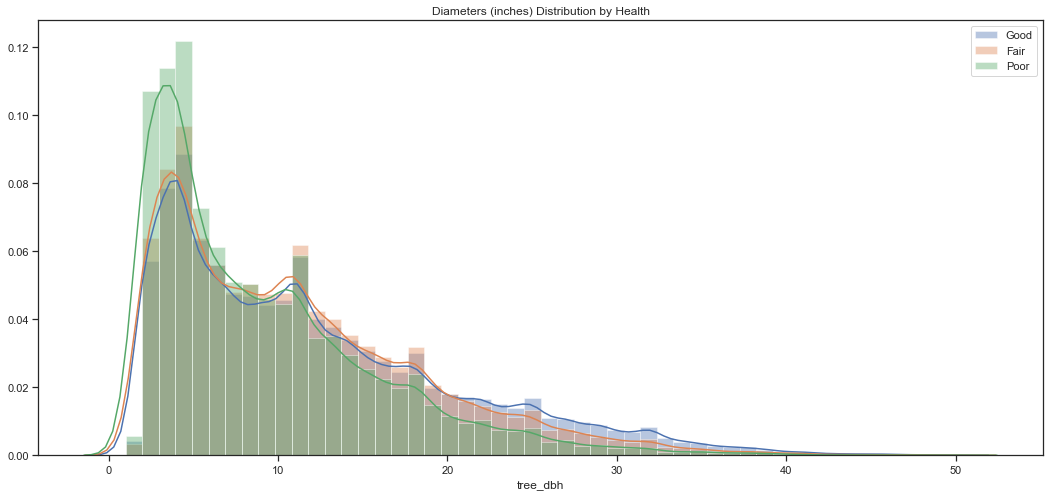

In [34]:
# plotting the distribution of diameters

plt.figure(figsize=(18, 8))
sns.distplot(health_good, label='Good')
sns.distplot(health_fair, label='Fair')
sns.distplot(health_poor, label='Poor')
plt.title('Diameters (inches) Distribution by Health')
plt.legend()
plt.show()

Since we are comparing three groups of trees (Good, Fair, Poor), we will use the analysis of variance, or ANOVA, test as an extension to the t-test.

While conducting this test, we will sample from our groups so that each group has the same size by randomly sampling 10,000 data points for each set.

In [59]:
anova_bs_reps_good = draw_bs_reps(health_good, np.mean, size=10000)
anova_bs_reps_fair = draw_bs_reps(health_fair, np.mean, size=10000)
anova_bs_reps_poor = draw_bs_reps(health_fair, np.mean, size=10000)

In [60]:
stats.f_oneway(anova_bs_reps_good, anova_bs_reps_fair, anova_bs_reps_poor)

F_onewayResult(statistic=7369266.957536272, pvalue=0.0)

## Analyzing Problems Distribution

We use a 2-sample t-test in order to determine any significance between two population means.

In [35]:
tree.groupby('health').num_problems.describe()

,count,mean,std,min,25%,50%,75%,max
health,,,,,,,,
Fair,96427.0,0.643658,0.872558,0.0,0.0,0.0,1.0,7.0
Good,528327.0,0.430014,0.710553,0.0,0.0,0.0,1.0,7.0
Poor,26781.0,0.684328,0.980530,0.0,0.0,0.0,1.0,9.0


In [36]:
pd.crosstab(tree.health, [tree.num_problems])

num_problems,0,1,2,3,4,5,6,7,8,9
health,,,,,,,,,,
Fair,53915,27984,10436,3275,717,84,15,1,0,0
Good,356491,127845,34377,8011,1479,105,18,1,0,0
Poor,15486,6579,2901,1414,324,59,16,0,1,1


While the number of problems a tree has decreases as the problems increases, after 7 problems, two poor trees have 8 or 9 problems. Overall, there are far less poor trees than good or fair trees.

In [37]:
# large table comparing variables

# pd.crosstab([tree.health, tree.root_stone, tree.root_grate, tree.root_other, tree.trunk_wire], 
#                     [tree.trnk_light, tree.trnk_other, tree.brch_light, tree.brch_shoe, tree.brch_other])

# Encoding Categorical Data - Label Encoder

In [38]:
# create a table specifically for label encoding

tree_label = tree.copy()

## root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, brch_other

We'll start by looking at the root, trunk, and branch columns. Since each of these columns contain simple Yes or No options, we create a new column with labels indicating **0 for No and 1 for Yes**.

In [39]:
# transform and map root_stone

rs_le = LabelEncoder()
rs_labels = rs_le.fit_transform(tree_label.root_stone)
tree_label['root_stone_labels'] = rs_labels

In [40]:
# transform and map problems columns

cols_transform = ['root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']

for x in cols_transform:
    lencode = LabelEncoder()
    tree_label[x + '_labels'] = lencode.fit_transform(tree_label[x])

In [41]:
# display columns with labels

tree_label[['root_stone', 'root_stone_labels', 'root_grate', 'root_grate_labels', 'root_other', 'root_other_labels', 
            'trunk_wire', 'trunk_wire_labels', 'trnk_light', 'trnk_light_labels', 'trnk_other', 'trnk_other_labels', 
            'brch_light', 'brch_light_labels', 'brch_shoe', 'brch_shoe_labels', 'brch_other', 'brch_other_labels']].head()

,root_stone,root_stone_labels,root_grate,root_grate_labels,root_other,root_other_labels,trunk_wire,trunk_wire_labels,trnk_light,trnk_light_labels,trnk_other,trnk_other_labels,brch_light,brch_light_labels,brch_shoe,brch_shoe_labels,brch_other,brch_other_labels
0,No,0,No,0,No,0,No,0,No,0,No,0,No,0,No,0,No,0
1,Yes,1,No,0,No,0,No,0,No,0,No,0,No,0,No,0,No,0
2,No,0,No,0,No,0,No,0,No,0,No,0,No,0,No,0,No,0
3,Yes,1,No,0,No,0,No,0,No,0,No,0,No,0,No,0,No,0
4,Yes,1,No,0,No,0,No,0,No,0,No,0,No,0,No,0,No,0


## Health

In [42]:
# choosing to manually map the numerical value to a variable response

health_map = {'Poor': 0, 'Fair': 1, 'Good': 2}

tree_label['health_labels'] = tree_label['health'].map(health_map)
tree_label[['health', 'health_labels']].head()

,health,health_labels
0,Fair,1
1,Fair,1
2,Good,2
3,Good,2
4,Good,2


In [43]:
# just the labeled columns

tree_label = tree_label[['health_labels', 'num_problems', 'tree_dbh', 
                         'root_stone_labels', 'root_grate_labels', 'root_other_labels', 
                         'trunk_wire_labels', 'trnk_light_labels', 'trnk_other_labels', 
                         'brch_light_labels', 'brch_shoe_labels', 'brch_other_labels']]

tree_label.head()

,health_labels,num_problems,tree_dbh,root_stone_labels,root_grate_labels,root_other_labels,trunk_wire_labels,trnk_light_labels,trnk_other_labels,brch_light_labels,brch_shoe_labels,brch_other_labels
0,1,0,3,0,0,0,0,0,0,0,0,0
1,1,1,21,1,0,0,0,0,0,0,0,0
2,2,0,3,0,0,0,0,0,0,0,0,0
3,2,1,10,1,0,0,0,0,0,0,0,0
4,2,1,21,1,0,0,0,0,0,0,0,0


In [44]:
tree_label.shape

(651535, 12)

In [45]:
round(tree_label.describe(), 2)

,health_labels,num_problems,tree_dbh,root_stone_labels,root_grate_labels,root_other_labels,trunk_wire_labels,trnk_light_labels,trnk_other_labels,brch_light_labels,brch_shoe_labels,brch_other_labels
count,651535.00,651535.00,651535.00,651535.00,651535.00,651535.00,651535.00,651535.00,651535.00,651535.00,651535.00,651535.00
mean,1.77,0.47,11.67,0.21,0.01,0.05,0.02,0.00,0.05,0.10,0.00,0.04
std,0.51,0.75,8.37,0.41,0.07,0.21,0.14,0.04,0.22,0.29,0.03,0.19
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,1.00,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2.00,9.00,50.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Encoding Categorical Data - One Hot Encoder / Dummy Variables

We are encoding the data using one-hot encoder.

In [46]:
# convert using get_dummies, columns of interest: curb_loc, steward, guards, sidewalk, borough

steward_dum = pd.get_dummies(tree.steward)
curb_loc_dum = pd.get_dummies(tree.curb_loc)
guards_dum = pd.get_dummies(tree.guards)
sidewalk_dum = pd.get_dummies(tree.sidewalk)
borough_dum = pd.get_dummies(tree.borough)

In [47]:
tree_onehot = pd.concat([steward_dum, curb_loc_dum, guards_dum, sidewalk_dum, borough_dum], axis=1)

tree_onehot.head()

,1or2,3or4,4orMore,None,OffsetFromCurb,OnCurb,Harmful,Helpful,None,Unsure,Damage,NoDamage,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0


# Combining the Columns

In [48]:
tree_encode = pd.concat([tree_label, tree_onehot], axis=1)

In [49]:
tree_encode.head(10)

,health_labels,num_problems,tree_dbh,root_stone_labels,root_grate_labels,root_other_labels,trunk_wire_labels,trnk_light_labels,trnk_other_labels,brch_light_labels,...,Helpful,None,Unsure,Damage,NoDamage,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,1,0,3,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,1,21,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,0,3,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2,1,10,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,2,1,21,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5,2,0,11,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
6,2,0,11,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
7,2,1,9,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8,2,0,6,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
9,1,0,21,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [50]:
tree_encode.shape

(651535, 29)

# Next Steps

In [51]:
## Start using Random Forest - works better with categorical data
## Decision Tree
## Logisitic Regression
## SVM

In [52]:
## Unbalanced data set - handle this in the machine learning
## Oversampling or undersampling or random sampling

## Statistical analysis is not for target variables

## Stratified sampling - happens during machine learning
## Python has lots of APIs to apply stratified sampling